## FEATURE SELECTION

[Gihub code exemple :](https://github.com/krishnadulal/Feature-Selection-in-Machine-Learning-using-Python-All-Code)

[Plot Feature selection](https://github.com/scikit-learn/scikit-learn/blob/main/examples/feature_selection/plot_feature_selection.py)

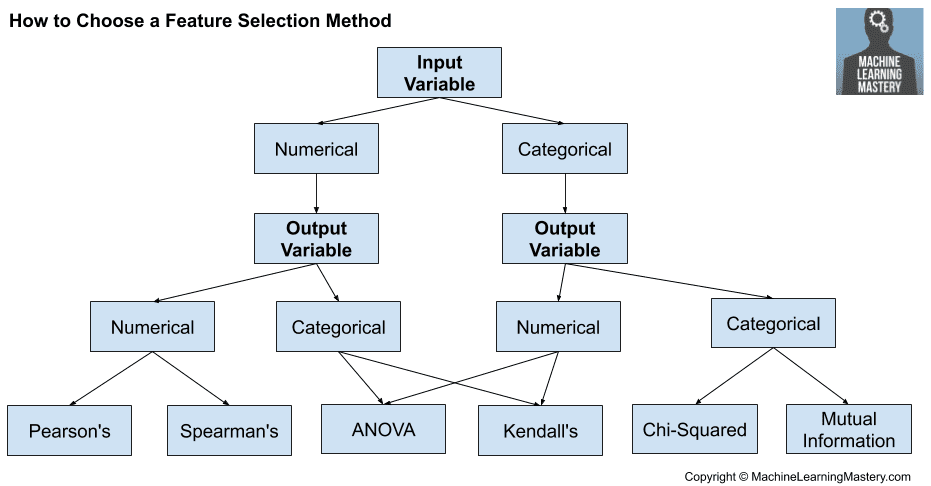

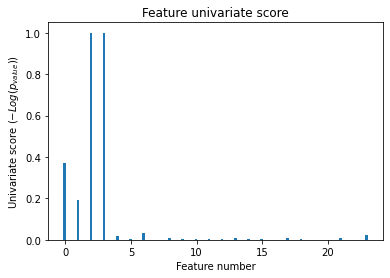

Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


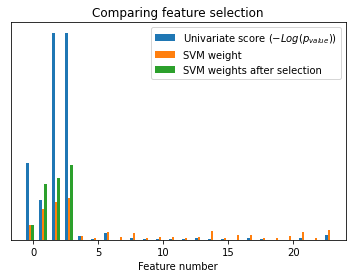

In [4]:
"""
============================
Univariate Feature Selection
============================
This notebook is an example of using univariate feature selection
to improve classification accuracy on a noisy dataset.
In this example, some noisy (non informative) features are added to
the iris dataset. Support vector machine (SVM) is used to classify the
dataset both before and after applying univariate feature selection.
For each feature, we plot the p-values for the univariate feature selection
and the corresponding weights of SVMs. With this, we will compare model
accuracy and examine the impact of univariate feature selection on model
weights.
"""

# %%
# Generate sample data
# --------------------
#
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# %%
# Univariate feature selection
# ----------------------------
#
# Univariate feature selection with F-test for feature scoring.
# We use the default selection function to select
# the four most significant features.
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# %%
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# %%
# In the total set of features, only the 4 of the original features are significant.
# We can see that they have the highest score with univariate feature
# selection.

# %%
# Compare with SVMs
# -----------------
#
# Without univariate feature selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

# %%
# After univariate feature selection
clf_selected = make_pipeline(SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

# %%
plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

# %%
# Without univariate feature selection, the SVM assigns a large weight
# to the first 4 original significant features, but also selects many of the
# non-informative features. Applying univariate feature selection before
# the SVM increases the SVM weight attributed to the significant features,
# and will thus improve classification.